1. csv 폴더에서 Sales Records.csv 파일 로드
2. 'Order ID', 'Total Revenue', 'Total Cost', 'Total Profit', 'Sales Channel' 컬럼을 제거
3. 컬럼의 이름들을 변경 -> ['대륙', '국가', '상품종류', '우선순위', '주문일자', '발송일자', '판매개수', '단가', '원가']
4. 데이터에 결측치가 존재하는가 ?
5. 대륙, 국가를 기준으로 오름차순 정렬
6. index를 재지정(기존의 index 제거)
7. 새로운 파생변수 생성
    - 총단가 == 판매개수 * 단가
    - 총원가 == 판매개수 * 원가
    - 총이윤 == 총단가 - 총원가
    

In [1]:
import pandas as pd # 작업을 위해 pandas 로드

In [29]:
# 1. csv 폴더에서 Sales Records.csv 파일 로드

sales_records = pd.read_csv('../../csv/Sales Records.csv')

df = sales_records.copy() # 미리 백업본 만들어놓기

In [30]:
# 2. 'Order ID', 'Total Revenue', 'Total Cost', 'Total Profit', 'Sales Channel' 컬럼을 제거

df.drop(['Order ID', 'Total Revenue', 'Total Cost', 'Total Profit', 'Sales Channel'],
        axis= 1,
        inplace= True)

In [31]:
# 3. 컬럼의 이름들을 변경 -> ['대륙', '국가', '상품종류', '우선순위', '주문일자', '발송일자', '판매개수', '단가', '원가']
    # rename()으로 하나하나 바꾸는 것 대신 통으로 바꾸는 방법

df.columns = ['대륙', '국가', '상품종류', '우선순위', '주문일자', '발송일자', '판매개수', '단가', '원가']

In [32]:
# 4. 데이터에 결측치가 존재하는가 ?
    # describe() - 통계 요약 정보를 출력하기 편함
    # isna().sum() - 컬럼별 결측치의 개수를 출력
    # info() - 결측치 확인이 제일 편함

df.describe()

df.isna().sum()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대륙      10000 non-null  object 
 1   국가      10000 non-null  object 
 2   상품종류    10000 non-null  object 
 3   우선순위    10000 non-null  object 
 4   주문일자    10000 non-null  object 
 5   발송일자    10000 non-null  object 
 6   판매개수    10000 non-null  int64  
 7   단가      10000 non-null  float64
 8   원가      10000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 703.3+ KB


In [33]:
# 5. 대륙, 국가를 기준으로 오름차순 정렬
df.sort_values(['대륙', '국가'],
               inplace= True)

In [34]:
# 6. index를 재지정(기존의 index 제거)
df.reset_index(drop= True,
               inplace= True)

In [35]:
# 7. 새로운 파생변수 생성
    # - 총단가 == 판매개수 * 단가
    # - 총원가 == 판매개수 * 원가
    # - 총이윤 == 총단가 - 총원가

df['총단가'] = df['판매개수'] * df['단가']

df['총원가'] = df['판매개수'] * df['원가']

df['총이윤'] = df['총단가'] - df['총원가']

In [37]:
# 8. 확인

df.describe()

df.head

,대륙,국가,상품종류,우선순위,주문일자,발송일자,판매개수,단가,원가,총단가,총원가,총이윤
0,Asia,Bangladesh,Personal Care,L,12/11/2016,1/13/2017,9420,81.73,56.67,769896.60,533831.40,236065.20
1,Asia,Bangladesh,Cosmetics,M,7/29/2010,9/11/2010,577,437.20,263.33,252264.40,151941.41,100322.99
2,Asia,Bangladesh,Vegetables,C,4/28/2014,5/5/2014,34,154.06,90.93,5238.04,3091.62,2146.42
3,Asia,Bangladesh,Cereal,L,6/22/2010,6/28/2010,9768,205.70,117.11,2009277.60,1143930.48,865347.12
4,Asia,Bangladesh,Office Supplies,H,3/20/2013,4/11/2013,7731,651.21,524.96,5034504.51,4058465.76,976038.75


1. 대륙별 총 이윤의 합이 가장 높은 대륙은 어디인가 ?

2. 국가별 총 이윤의 합이 가장 높은 상위 10개의 국가는 어디인가 ?

3. 어떤 상품이 가장 많이 팔렸는가 ?

In [47]:
# 대륙별 총 이윤의 합
    # 대륙별로 그룹화
    # 그룹화 함수 : groupby([기준이 되는 column들])
        # 이 구문 자체로는 출력이 되진 않고 그룹화 되어 있는 저장소의 위치만을 return
        # 그룹화 되어 있다는 것으로 인지하고, 추가 조작이 필요
        # 그룹화 되어있는 df의 ~~ 라고 생각하면 되므로 dataframe.groupby([기준이 되는 column들])[조작이 필요한 column들].조작할 함수 이렇게 붙이면 됨

df.groupby(['대륙'])['총이윤'].sum() # [['총이윤', '총단가]]도 되고 [['총이윤']] 도 데이터 프레임의 형태로 나옴

    # 전체 데이터 프레임에서 column을 필터링 -> 그룹화

group_data = df[ ['대륙', '총이윤'] ].groupby(['대륙']).sum()

In [49]:
group_data.sort_values('총이윤', 
                       ascending= False,)

,총이윤
대륙,
Europe,1.027000e+09
Sub-Saharan Africa,9.996421e+08
Asia,5.874033e+08
Middle East and North Africa,5.099239e+08
Central America and the Caribbean,4.033578e+08
Australia and Oceania,3.240712e+08
North America,9.949552e+07


In [52]:
# 국가별 총 이윤의 합이 가장 높은 상위 10개의 국가는 어디인가 ?

group_data2 = df[ ['국가', '총이윤']].groupby(['국가']).sum()

In [58]:
group_data2.sort_values('총이윤',
                        ascending= False)\
                        .head(10)

,총이윤
국가,
Kiribati,32454798.26
Qatar,30861356.79
Grenada,30302769.90
Taiwan,30044779.98
Malawi,29329125.05
Botswana,29019726.67
Bangladesh,28092720.77
Lithuania,28063374.02
Burundi,27911293.45


In [76]:
## 과연 한국의 등수는 몇 등일까 ?
    # index는 list이므로 list 내장 함수(index())를 사용

group_data2_1 = group_data2.sort_values('총이윤',
                        ascending= False)\


indexes = list(group_data2_1.index)

indexes.index('South Korea') + 1 # 0부터 시작하니깐 등수로는 + 1 == 48등

47

In [78]:
    # index를 초기화 (기존의 index를 보존)

group_data2_2 = group_data2_1.reset_index()
group_data2_2.loc[
    group_data2_2['국가'] == 'South Korea'
] # 47번째 index이므로 등수는 48등 (index 시작이 0이니깐)

,국가,총이윤
47,South Korea,23893933.75


In [79]:
# 어떤 상품이 가장 많이 팔렸는가 ?

df[['상품종류', '판매개수']]\
    .groupby(['상품종류'])\
        .sum()\
            .sort_values(['판매개수'],
                         ascending= False)\
                         .head(1)

,판매개수
상품종류,
Personal Care,4402827


In [ ]:
# 그룹화를 할 column이 2개 이상인 경우

# 그룹화 연산 역시 2개 이상인 경우
    # .agg(['원하는 연산들'])

# pivot_table() <- 데이터 프레임이 아니라 pandas에서 로드해야 하는 함수
    # pd.pivot_table(재구조화 할 데이터) 데이터 프레임 안에 있는 함수가 아니기 때문에 인자로 self를 받지 못해서 인자값으로 데이터를 넣어줘야 한다

group_data4 =\
    df[['국가', '상품종류', '판매개수']]\
        .groupby(['국가', '상품종류']).agg(['sum', 'count'])


In [99]:
# pivot_table()
    # pandas에 내장된 함수

pd.pivot_table(df,
               index = '국가',
               columns = '상품종류',
               values= '판매개수',
               aggfunc= 'sum',
               margins = True,
               fill_value= 0,
               sort= 'All')

상품종류,Baby Food,Beverages,Cereal,Clothes,Cosmetics,Fruits,Household,Meat,Office Supplies,Personal Care,Snacks,Vegetables,All
국가,,,,,,,,,,,,,
Afghanistan,1368,14380,54917,29887,12177,15791,32221,39330,18338,18899,26466,24832,288606
Albania,25985,22109,18580,30199,20375,26785,23705,28387,12623,35973,9154,11462,265337
Algeria,36393,10330,32498,21002,30506,17578,8482,15915,25956,24629,21037,21186,265512
Andorra,17592,22132,22618,6296,16156,41365,12839,14747,29795,42303,18764,6628,251235
Angola,36948,20666,34274,11404,22465,29812,8305,22134,5879,30464,51486,14129,287966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,25450,7981,20189,17880,14571,20686,26646,47200,31262,32229,30201,25822,300117
Yemen,22672,25690,15503,21235,7238,24168,31091,15098,6335,41380,15054,18350,243814
Zambia,51886,9825,21888,16282,22115,34906,24334,23886,30959,23469,28108,0,287658


<Axes: xlabel='대륙'>

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47449 (\N{HANGUL SYLLABLE RYUG}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50980 (\N{HANGUL SYLLABLE YUN}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python312\sit

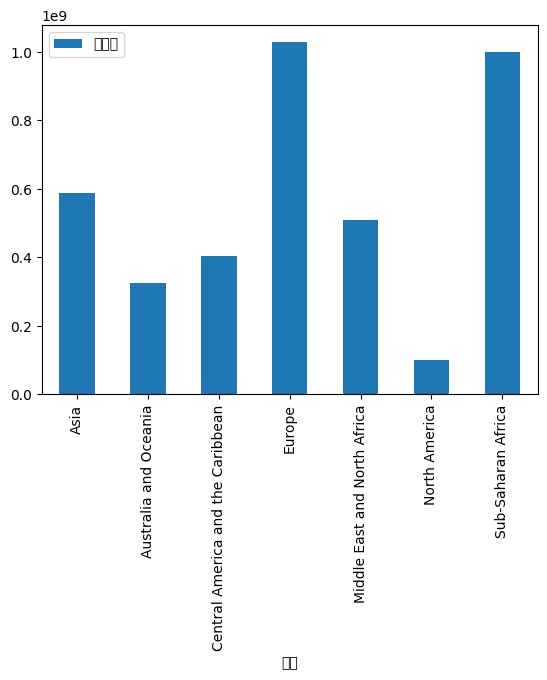

In [100]:
group_data.plot(kind= 'bar')

<Axes: xlabel='국가'>

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50980 (\N{HANGUL SYLLABLE YUN}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python312\site-

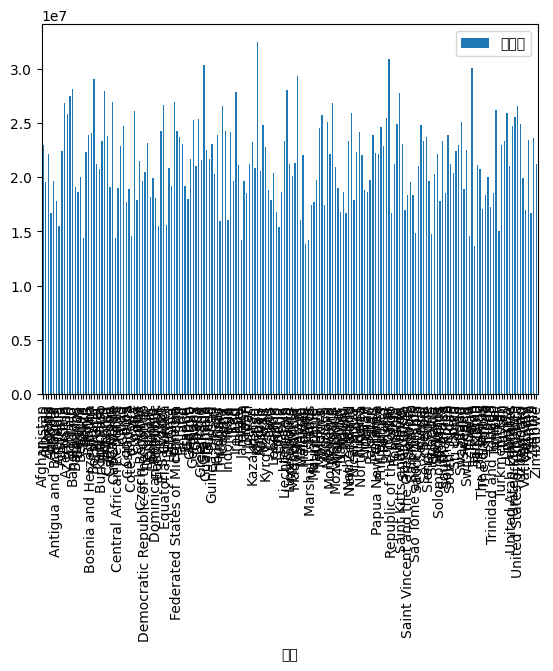

In [101]:
group_data2.plot(kind= 'bar') # 이건 간단하게 그래프를 그려주는 것

In [102]:
import matplotlib.pyplot as plt


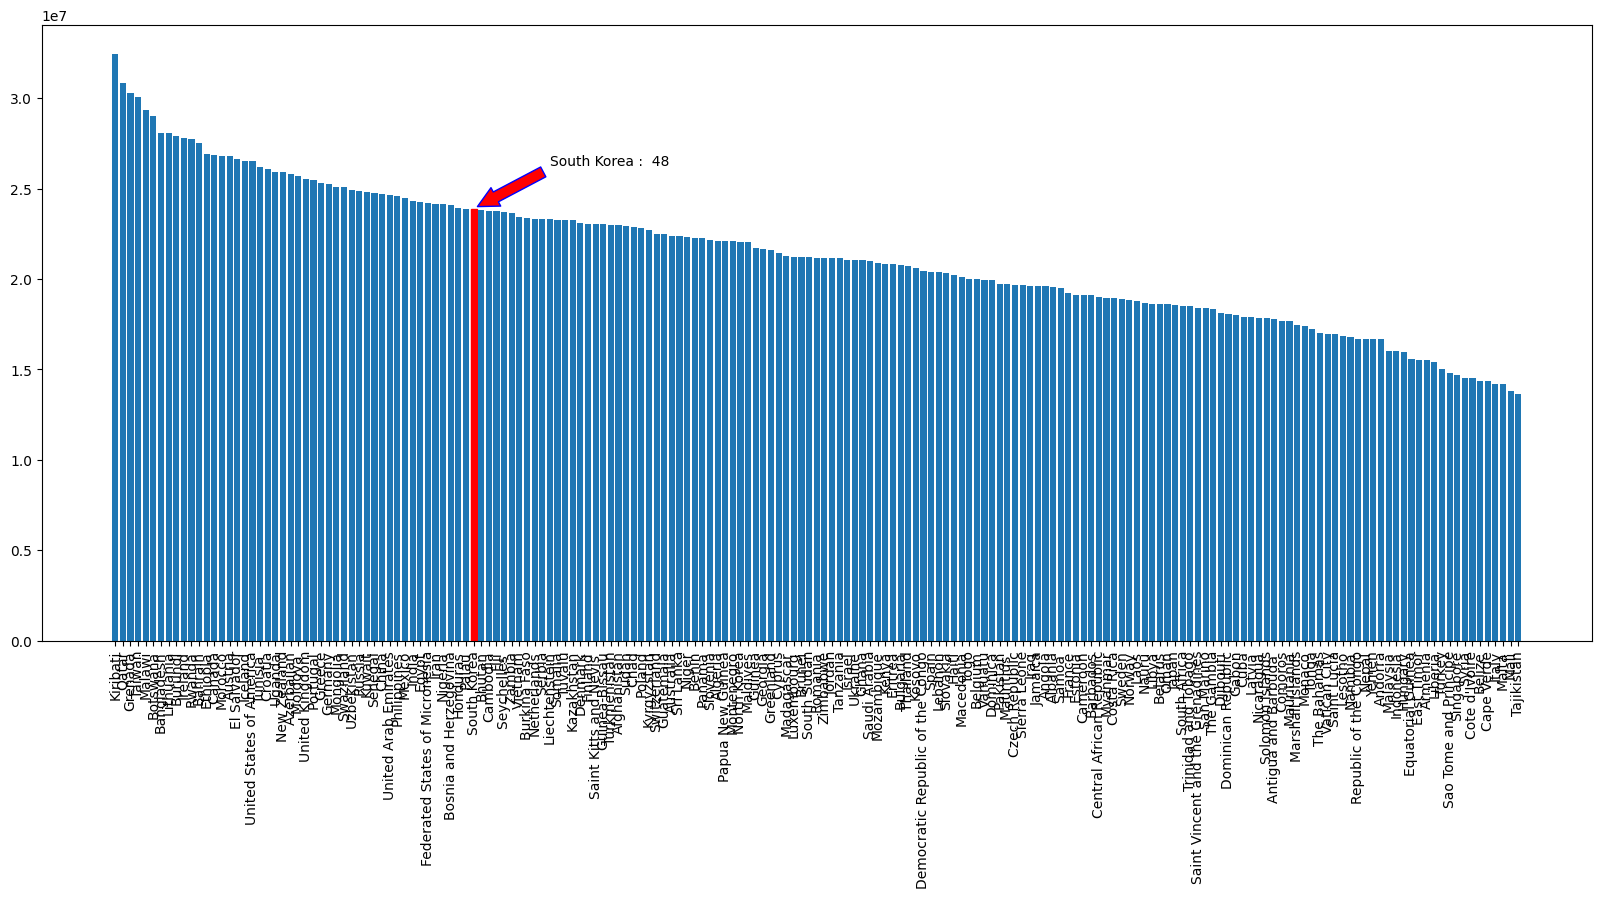

In [124]:
## group_data2_1 을 가지고 그래프 생성

# 막대 그래프 생성
x = group_data2_1.index
y = group_data2_1['총이윤']

korea_rank = list(group_data2_1.index).index('South Korea') # index에서 'South Korea'가 위치한 숫자
korea_value = group_data2_1.loc['South Korea', '총이윤'] # df에서 'South Korea'와 '총이윤'이 겹치는 위치의 값


# 그래프의 사이즈를 변경
plt.figure(figsize=(20, 8))


graph = plt.bar(x, y)

graph[korea_rank].set_color('r')
# x 축의 데이터들을 회전시킨다

plt.xticks(rotation = 90)

# 그래프에 주석을 추가
plt.annotate(
    f'South Korea :  {korea_rank + 1}',
    xy= (korea_rank, korea_value), # 화살표가 지정되는 좌표
    xytext= (korea_rank + 10, korea_value  * 1.1), # 주석의 좌표
    arrowprops= {
        'facecolor' : 'r', # 화살표 내부의 색
        'edgecolor' : 'b', # 화살표 테두리의 색
        'headwidth' : 15, # 화살표 머리의 너비 # 값이 커지면 화살표 머리가 좌우로 늘어난다
        'headlength' : 15, # 화살표 머리의 길이 # 값이 커지면 화살표 머리가 앞뒤로 늘어난다
        'width' : 8, # 화살표 꼬리의 너비 # 값이 커지면 화살표 꼬리의 너비가 커진다
        'shrink' : 0.05 # 화살표와 주석의 거리 # 값이 커지면 거리가 멀어짐
    }
    )


plt.show()

